In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завантажити дані

In [2]:
train_targets = pd.read_csv("train_targets.csv", index_col = "match_id_hash")
y = train_targets["radiant_win"].astype('int')
y.head()

match_id_hash
a400b8f29dece5f4d266f49f1ae2e98a    0
b9c57c450ce74a2af79c9ce96fac144d    1
6db558535151ea18ca70a6892197db41    1
46a0ddce8f7ed2a8d9bd5edcbb925682    1
b1b35ff97723d9b7ade1c9c3cf48f770    0
Name: radiant_win, dtype: int64

In [3]:
train_features = pd.read_csv("train_features.csv", index_col = "match_id_hash")
test_features = pd.read_csv("test_features.csv", index_col= "match_id_hash")
train_features.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.25,0,0,0,0


Вивести форму X , y (кількість рядків, стовпчиків) 

In [4]:
train_features.shape, y.shape

((39675, 245), (39675,))

# Підготуємо описання задачі

Задача - визначити команду, яка виграє у матчі Dota 2 (Radiant або Dire) за характеристиками матчу. Фактично, це бінарна класифікація, цільовою змінною якої є "radiant_win" (True, False) <br>

# Опис колонок, що описують стан гри:

game_time - момент, в який взято стан гри <br>
game_mode - режим гри (категорія) <br>
lobby_type - ??? <br>
objectives_len - ??? <br>
chat_len - ??? (довжина чату, мабуть) <br>

Команди Radiant і Dire складаються із пяти гравців. Стан гравців описують такі предиктори:

r{i}_hero_id, d{i}_hero_id - ідентифікатор героя, якого обрав гравець (категорія) <br>
r{i}_lh, d{i}_lh - number of enemy team creeps killed <br>
r{i}_denies, d{i}_denies - number of same-team creeps killed to deny enemy gold <br>
... <br>
r{i}_x, r{i}_y, d{i}_x, d{i}_y - поточна локація гравця на карті <br>
та інші характеристики, по типу "кількість золота", "кількість xp", "кількість захоплених веж"

In [5]:
#унікальні герої
unique_heroes = [str(i) for i in sorted(train_features["r1_hero_id"].unique()) ] 

# Попередня обробка та нормалізація даних

Обробка даних буде складатись із трьох частин: <br>
1) кодування категоріальних ознак (OneHotEncoder) <br>
2) кодування набору героїв в команді (мішок слів, CountVectorizer) <br>
3) нормалізація numeric-ознак

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder() #для кодування категорій

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=unique_heroes) #для кодування мішка слів

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #для нормалізації numeric-ознак

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_features, y, test_size=0.2, stratify = y)

In [8]:
%%time
#game_mode, lobby_type - категорійні ознаки. Закодуємо їх за допомогою OneHotEncoder
def get_cat(df, train=True):
    
    if(train):
        ohe.fit(df[["game_mode","lobby_type"]])
    cat_cols = ["gamemode"+ i for i in ohe.categories_[0].astype('str')] + ["lobbytype"+i for i in ohe.categories_[1].astype('str')]
    cat_df = pd.DataFrame(data = ohe.transform(df[["game_mode","lobby_type"]]).toarray(), columns = cat_cols)
    return cat_df

cat_df_train = get_cat(X_train, train=True)
cat_df_val = get_cat(X_val, train=False)

CPU times: user 23.6 ms, sys: 549 µs, total: 24.1 ms
Wall time: 22.3 ms


In [9]:
%%time
#побудуємо мішок слів відносно набору героїв в командах.
def get_bag(df, train=True):
    radiant_row = df[f"r1_hero_id"].astype('str')
    dire_row = df[f"d1_hero_id"].astype('str')
    for i in range(2,6):
        radiant_row += " "
        radiant_row += df[f"r{i}_hero_id"].astype('str')
        dire_row += " "
        dire_row += df[f"d{i}_hero_id"].astype('str')

    radiant_bag = vectorizer.transform(radiant_row).toarray()
    dire_bag = vectorizer.transform(dire_row).toarray()

    bag_of_heroes = pd.DataFrame(data = (radiant_bag - dire_bag), columns = unique_heroes)
    return bag_of_heroes

bag_of_heroes_train = get_bag(X_train)
bag_of_heroes_val = get_bag(X_val)
bag_of_heroes_train

CPU times: user 1.2 s, sys: 86.8 ms, total: 1.29 s
Wall time: 1.29 s


,1,2,3,4,5,6,7,8,9,10,...,107,108,109,110,111,112,113,114,119,120
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31736,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
31737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Проведемо нормалізацію чисельних ознак, що лишилися.

In [10]:
def get_numeric_df(df, train=True):
    df = df.drop(columns=["game_mode","lobby_type"])
    df = df.drop(columns = [f"r{i}_hero_id" for i in range(1,6)]+[f"d{i}_hero_id" for i in range(1,6)])
    if(train):
        scaler.fit( df )
    numeric_df = pd.DataFrame(data=scaler.transform(df), columns=df.columns )
    return numeric_df

numeric_df_train = get_numeric_df(X_train, train=True)
numeric_df_val = get_numeric_df(X_val, train=False)

In [11]:
final_df_train = pd.concat([cat_df_train, numeric_df_train, bag_of_heroes_train], axis=1)
final_df_val = pd.concat([cat_df_val,numeric_df_val, bag_of_heroes_val], axis=1)

final_df_train

,gamemode2,gamemode3,gamemode4,gamemode5,gamemode12,gamemode16,gamemode22,gamemode23,lobbytype0,lobbytype7,...,107,108,109,110,111,112,113,114,119,120
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,-1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31735,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
31736,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
31737,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
31738,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


# Дані нормалізовані, застосуємо до них PCA та t-SNE

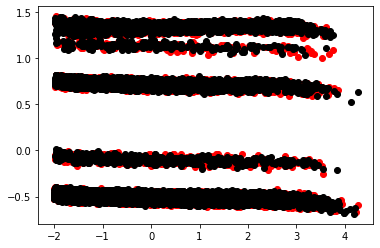

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_reduced = pca.fit_transform(final_df_train)
plt.scatter(train_reduced[y_train==0][:,0], train_reduced[y_train==0][:,1], color='red')
plt.scatter(train_reduced[y_train==1][:,0], train_reduced[y_train==1][:,1], color='black')

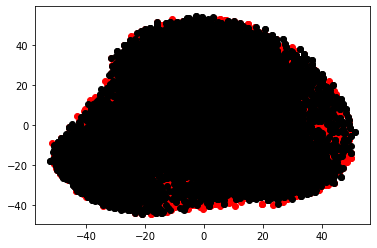

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
train_reduced = tsne.fit_transform(final_df_train)
plt.scatter(train_reduced[y_train==0][:,0], train_reduced[y_train==0][:,1], color='red')
plt.scatter(train_reduced[y_train==1][:,0], train_reduced[y_train==1][:,1], color='black')

In [14]:
#FOR KAGGLE. Learning on full dataset

#from sklearn.linear_model import LogisticRegression
#log_reg = LogisticRegression(solver = 'newton-cg')
#log_reg.fit(pd.concat([final_df_train,final_df_val],axis=0), pd.concat([y_train, y_val],axis=0)  )

#cat_df_test = get_cat(test_features, train=False)
##numeric_df_test = get_numeric_df(test_features, train=False)
#bag_of_heroes_test = get_bag(test_features)

#final_df_test = pd.concat([cat_df_test, numeric_df_test, bag_of_heroes_test], axis = 1)

#sub = pd.read_csv("sample_submission.csv")
#sub['radiant_win_prob'] = log_reg.predict_proba(final_df_test)[:,1]
#sub.to_csv("logreg2.csv", index=False)